<a href="https://colab.research.google.com/github/ranjithnrjk/PyTorch_basics/blob/main/SimpleNeuralNetwork_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd

In [58]:
!curl -O https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3858  100  3858    0     0  14524      0 --:--:-- --:--:-- --:--:-- 14558


In [59]:
df = pd. read_csv('/content/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [60]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [61]:
class Model(nn.Module):
    # In feature
    # HL 1
    # HL 2
    # Out feature

    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.in_features = in_features
        self.h1 = h1
        self.h2 = h2
        self.out_features = out_features
        self.fc1 = nn.Linear(in_features=in_features, out_features=h1)
        self.fc2 = nn.Linear(in_features=h1, out_features=h2)
        self.out = nn.Linear(in_features=h2, out_features=out_features)

    def forward(self, x):
        "This function moves the data forward from bottom to top of neural network"
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

In [62]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [63]:
print(f"Mapping ==> {dict(zip(range(len(encoder.classes_)), encoder.classes_))}")

Mapping ==> {0: 'setosa', 1: 'versicolor', 2: 'virginica'}


In [64]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :4].values
Y = df['species'].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, stratify=Y, random_state=41)

In [65]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [66]:
model = Model()

In [67]:
# Set the criterior/Loss Function to see how far the model is fome desired state
criterion = nn.CrossEntropyLoss()

# Set the optimizer and learning rate to change the model parameters based the criteriorn ouptput
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)

In [68]:
# Train Loop
running_loss = []
epochs = 100
for i in range(epochs):
    # Go forward and get a prediction
    y_pred = model.forward(x_train)

    loss = criterion(y_pred, y_train) # Measure the error/loss in the models predictions

    running_loss.append(loss.detach().numpy()) # Keep track of the losses

    if i % 10 == 0: # Print loss and epoch after every 10 epochs
        print(f'Epoch: {i} ==> Loss: {loss}')

    # Back propogation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 ==> Loss: 1.1623218059539795
Epoch: 10 ==> Loss: 0.9159645438194275
Epoch: 20 ==> Loss: 0.7008466720581055
Epoch: 30 ==> Loss: 0.5129246711730957
Epoch: 40 ==> Loss: 0.42385345697402954
Epoch: 50 ==> Loss: 0.36070793867111206
Epoch: 60 ==> Loss: 0.2795538902282715
Epoch: 70 ==> Loss: 0.1908562332391739
Epoch: 80 ==> Loss: 0.12512682378292084
Epoch: 90 ==> Loss: 0.08837684243917465


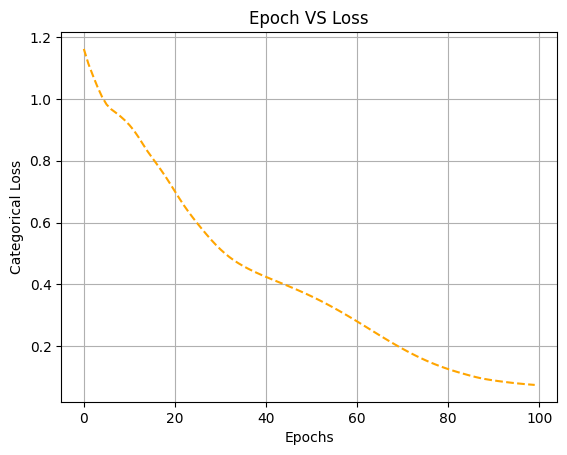

In [77]:
import matplotlib.pyplot as plt
plt.plot(range(epochs), running_loss, '--', c='orange')
plt.title('Epoch VS Loss')
plt.ylabel('Categorical Loss')
plt.xlabel('Epochs')
plt.grid()
plt.show()

In [78]:
print(4)

4
